### Materialy do zajec: Regresja logistyczna 1: "implementacja w numpy"

**Ustawiamy ziarno losowe**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100) # ziarno losowe - za każdym razem zaczyna od tego samego punktu (zawsze będą tak samo losowe) wyniki będa porównywalne (do porównania modeli)

### Przybliżamy wartość równaniem:

\begin{align*}
\hat y = \frac{1}{1 + e^{-z}}
\end{align*}

\begin{align*}
z = wx + b
\end{align*}

\begin{align*}
w = w - \alpha * dw
\end{align*}

\begin{align*}
b = b - \alpha * db
\end{align*}

#obliczanie spadku gradientu

### Czym jest dw i db?

\begin{align*}
\alpha = krok
\end{align*}

\begin{align*}
dw = \frac{dJ}{dw} = \frac{1}{N} \sum x_{i}(\hat y_{i}-y_{i})
\end{align*}

\begin{align*}
db = \frac{dJ}{db} = \frac{1}{N} \sum (\hat y_{i} - y_{i})
\end{align*}

### Funkcja kosztu

\begin{align*}
J(w,b) = \frac{1}{N} \sum_{i=1}^{n} \left[y_{i} log(\hat y_{i}) + (1-y_{i})log(1- \hat y_{i})\right]
\end{align*}

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/330px-Petal-sepal.jpg)

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
(iris.target != 0) # przewidujemy czy jest setosa

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [10]:
(iris.target != 0) * 1 # przekształcenie na dane binarne

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
x = iris.data[:, :2]
y = (iris.target != 0) * 1

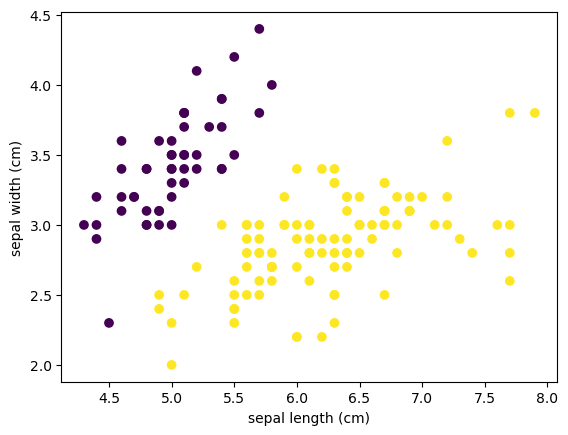

In [12]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

## Sigmoid

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
np.round(sigmoid(0), 4)

0.5

\begin{align*}
z = wx + b
\end{align*}

\begin{align*}
\hat y = \frac{1}{1 + e^{-z}}
\end{align*}

<div>
<img src="https://hvidberrrg.github.io/deep_learning/activation_functions/assets/sigmoid_function.png" width="300"/>
</div>

Zwraca prawdopodobienstwo przynaleznosci do klasy na podstawie cech, wag, biasu

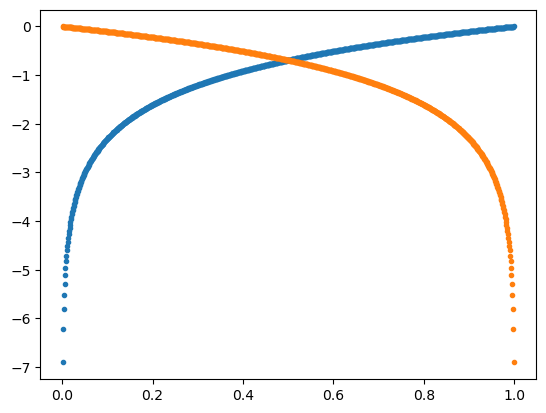

In [15]:
space = np.linspace(0, 1, 1000)[1:-1]
plt.clf()
plt.plot(space, np.log(space), '.')
plt.plot(space, np.log(1-space), '.')

## Funkcja kosztu

\begin{align*}
J(w,b) = - \frac{1}{N} \sum_{i=1}^{n} \left[y_{i} log(\hat y_{i}) + (1-y_{i})log(1- \hat y_{i})\right]
\end{align*}

Dla kazdej probki oblicza sie prawdopodobiennstwo przynaleznosci do klasy "1", porownujemy z klasa oryginalna i sprawdzamy na ile predykcja jest trafna

In [16]:
def koszt(pred, y): #y oznacza klase prawdziwa, zgodna z labelem z oryginalnych danych
    return (-y * np.log(pred) - (1 - y) * np.log(1 - pred)).mean()

### Czym jest dw i db?

\begin{align*}
w = w - \alpha * dw
\end{align*} 

\begin{align*}
b = b - \alpha * db
\end{align*}

\begin{align*}
\alpha = krok
\end{align*}

\begin{align*}
dw = \frac{dJ}{dw} = \frac{1}{N} \sum x_{i}(\hat y_{i}-y_{i})
\end{align*}

\begin{align*}
db = \frac{dJ}{db} = \frac{1}{N} \sum (\hat y_{i} - y_{i})
\end{align*}

In [21]:
## https://pl.wikipedia.org/wiki/Mno%C5%BCenie_macierzy

## http://optymalizacja.w8.pl/NajszybszegoSpadku.html

# learnign rate - szybkość uczenia 
def spadek_gradientu(x, y, lr, iteracje): # gradient decent
    liczba_cech = x.shape[1]
    bias = 0 # z taka wartoscia startujemy na poczatek
    wagi = np.zeros(liczba_cech) # kazda cecha ma swoja wage
    
    for n in range(iteracje):
        Z = np.dot(wagi, np.transpose(x)) + bias # wagi * transponowana macierz cech + bias 
        pstwa_klas = sigmoid(Z) # prawdopodobienstwo przynaleznosci do danej klasy dla probki
        dZ = pstwa_klas - y
        
        dW = 1/len(y) * np.dot(np.transpose(x), dZ) 
        dB = 1/len(y) * np.sum(dZ)
        
        wagi = wagi - lr * dW # per iteracje: update wag i biasow
        bias = bias - lr * dB # LR learning rate (jak szybko optymalizować wagi i biasy, by dojść do minimum lokalnego)

        if n % 40 == 0:
            print("Koszt : ", koszt(pstwa_klas, y))
            
    return wagi, bias

In [27]:
wagi, bias = spadek_gradientu(x, y, 1, 200)

Koszt :  0.6931471805599454
Koszt :  0.22708466387257512
Koszt :  0.054242988392774985
Koszt :  0.05120063035918262
Koszt :  0.04879338985993965


In [28]:
wagi, bias

(array([ 4.52969675, -7.41815986]), -1.3194910928191497)

## Prawdopodobienstwa

In [30]:
Z = np.dot(wagi, np.transpose(x)) + bias # mnożenie x razy waga

In [31]:
prawdopodobienstwa_klas = sigmoid(Z)

In [33]:
np.round(prawdopodobienstwa_klas, 3) # prawdopodobieństwo wystapienia w klasie 

array([0.015, 0.201, 0.023, 0.03 , 0.005, 0.003, 0.003, 0.02 , 0.052,
       0.107, 0.013, 0.008, 0.138, 0.016, 0.009, 0.   , 0.003, 0.015,
       0.024, 0.002, 0.111, 0.003, 0.001, 0.063, 0.008, 0.284, 0.02 ,
       0.023, 0.048, 0.023, 0.071, 0.111, 0.   , 0.001, 0.107, 0.082,
       0.086, 0.003, 0.025, 0.031, 0.01 , 0.881, 0.006, 0.01 , 0.002,
       0.138, 0.002, 0.014, 0.008, 0.041, 0.999, 0.981, 0.999, 0.999,
       0.999, 0.977, 0.939, 0.956, 0.999, 0.901, 0.998, 0.959, 1.   ,
       0.992, 0.927, 0.998, 0.857, 0.993, 1.   , 0.996, 0.841, 0.996,
       1.   , 0.996, 0.998, 0.998, 1.   , 0.999, 0.987, 0.995, 0.997,
       0.997, 0.993, 0.997, 0.708, 0.654, 0.998, 1.   , 0.857, 0.994,
       0.987, 0.983, 0.997, 0.986, 0.982, 0.904, 0.952, 0.995, 0.962,
       0.977, 0.939, 0.993, 1.   , 0.997, 0.997, 1.   , 0.911, 1.   ,
       1.   , 0.99 , 0.988, 1.   , 0.999, 0.997, 0.985, 0.981, 0.997,
       0.995, 1.   , 1.   , 0.998, 0.964, 1.   , 0.999, 0.99 , 0.999,
       0.998, 0.983,

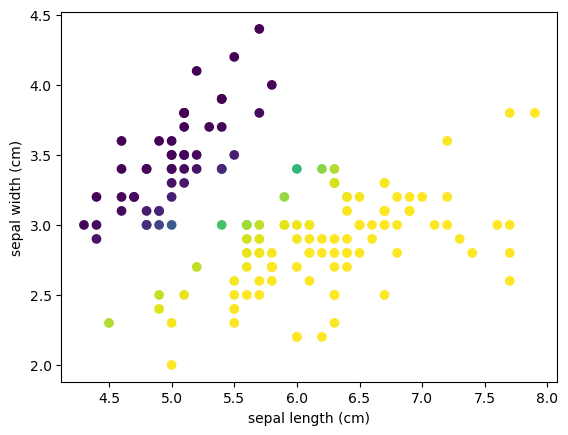

In [34]:
plt.scatter(x[:,0], x[:,1], c = prawdopodobienstwa_klas)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

## Predykcja

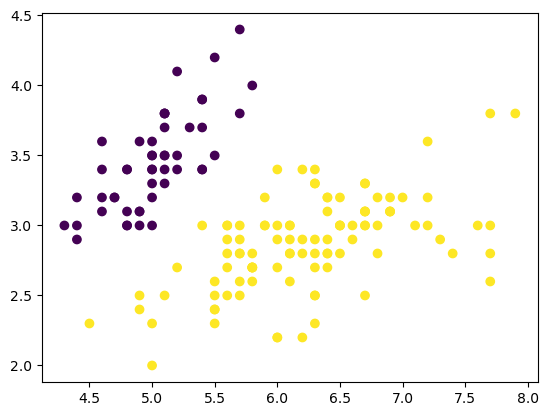

In [35]:
predykcja = []
for i in range(0, len(prawdopodobienstwa_klas)):
    if prawdopodobienstwa_klas[i] > 0.5:
        predykcja.append(1)
    else:
        predykcja.append(0)
        
plt.scatter(x[:,0], x[:,1], c = predykcja)

## Prawdziwe labele

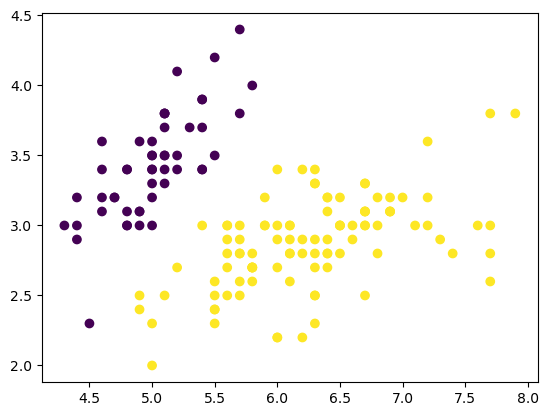

In [36]:
plt.scatter(x[:,0], x[:,1], c = y)